# Doğrusal Olmayan Regresyon Modelleri

# K en yakın komşu (K-nearst Neigbroos)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors

In [2]:
from warnings import filterwarnings # uyarı mesajlarıyla karşılaşmamak için bu yapılmalı
filterwarnings("ignore")

# KNN

In [3]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division", "NewLeague",]]) #kategorik değişkenleri dummies değişkenlere çevirmeliyiz
y=df["Salary"]  # bağımlı değişkeni y değişkenine kaydediyoruz
X_=df.drop(["Salary", "League", "Division","NewLeague"], axis=1).astype("float64") #ilk hallerini dışarıda bırakıyoruz
X=pd.concat([X_,dms[["League_N", "Division_W","NewLeague_N"]]], axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=99)


In [4]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
95,382.0,119.0,13.0,54.0,58.0,36.0,12.0,2133.0,594.0,41.0,287.0,294.0,227.0,59.0,156.0,9.0,1,1,1
285,281.0,76.0,3.0,42.0,25.0,20.0,8.0,2658.0,657.0,48.0,324.0,300.0,179.0,106.0,144.0,7.0,0,0,0
257,348.0,90.0,11.0,50.0,45.0,43.0,10.0,2288.0,614.0,43.0,295.0,273.0,269.0,60.0,176.0,6.0,0,0,0
177,441.0,118.0,28.0,84.0,86.0,68.0,8.0,2723.0,750.0,126.0,433.0,420.0,309.0,190.0,2.0,2.0,0,0,0
196,464.0,128.0,28.0,67.0,94.0,52.0,13.0,5829.0,1552.0,210.0,740.0,840.0,452.0,0.0,0.0,0.0,0,1,0


# Model

In [5]:
Knn_model=KNeighborsRegressor().fit(X_train, y_train) #modelimizi fit işlemine tabi tutup modeli kuruyoruz

In [6]:
Knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [7]:
Knn_model.n_neighbors #komşu sayısını çektik

5

In [8]:
Knn_model.metric #metric (uzunluk) değerine ulaştık

'minkowski'

In [9]:
Knn_model.leaf_size

30

In [10]:
dir(Knn_model) #alet çantası

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_kneighbors_reduce_func',
 '_pairwise',
 '_tree',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_jobs',
 'n_neighbors',
 'p',
 'predict',
 'radius',
 'score',
 'set_params',
 'weights']

In [11]:
Knn_model.predict(X_train)[0:5] #bağımsız değişkenleri bularak bağımlı değişkenler tahmin edilir

array([451.5   , 372.1668, 451.5   , 701.8334, 747.5   ])

In [12]:
y_pred=Knn_model.predict(X_test) # tahmin modelimizi y_pred değişkenine atadık

In [13]:
np.sqrt(mean_squared_error(y_test, y_pred)) #hatakareler ortalamasının karekökü değeri alınır. KNN modeliyle elde ettimiz test hatamız

421.0615094518082

In [14]:
Knn_model.predict(X_train)[0:5]

array([451.5   , 372.1668, 451.5   , 701.8334, 747.5   ])

In [15]:
y_tahminpred=Knn_model.predict(X_train)

In [16]:
np.sqrt(mean_squared_error(y_train,y_tahminpred))

235.1478479372827

# Model Tuning

In [17]:
Knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [18]:
range(10) # range(0,10) arasındaki sayıları ifade eder

range(0, 10)

In [19]:
RMSE=[]

for H in range(10):
    H= H+1 # her iterasyon geldiğinde H ı bir arttırarak 2. H a geç
    Knn_model=KNeighborsRegressor(n_neighbors=H).fit(X_train,y_train)
    y_pred=Knn_model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    RMSE.append(rmse)
    print("H=", H, "Tahmin edilen değer", rmse )
    
    
    
    

H= 1 Tahmin edilen değer 452.29505745096947
H= 2 Tahmin edilen değer 420.02075967258975
H= 3 Tahmin edilen değer 405.1492459056758
H= 4 Tahmin edilen değer 422.4062233035507
H= 5 Tahmin edilen değer 421.0615094518082
H= 6 Tahmin edilen değer 417.2714768856567
H= 7 Tahmin edilen değer 412.71917508106816
H= 8 Tahmin edilen değer 410.10036439635763
H= 9 Tahmin edilen değer 417.1254091278897
H= 10 Tahmin edilen değer 413.34108156962645


In [20]:
#GridSearchCV (kullanacak olduğumuz makine öğrenimi algoritmalarında belirlemeye çalıştığımız hiper parametrelerin değerlerini belirlemek için kullanılan fonksiyonn)

In [21]:
knn_params={"n_neighbors": np.arange(1,30,1)} #aranacak olan parametre değerlerimiz

In [22]:
knn=KNeighborsRegressor() #model nesnemizi oluşturalım

In [23]:
knn_cv_model=GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train) 

In [24]:
knn_cv_model.best_params_ #en iyi H sayısı

{'n_neighbors': 7}

In [25]:
#final model
knn_final=KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"]).fit(X_train,y_train) #final modeli kuruldu

In [26]:
y_pred=knn_final.predict(X_test) # modelimizi test ettik

In [27]:
np.sqrt(mean_squared_error(y_test,y_pred)) 

412.71917508106816

# Destek Vektör Regresyonu (Support Vector Regression)

In [28]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division", "NewLeague",]]) #kategorik değişkenleri dummies değişkenlere çevirmeliyiz
y=df["Salary"]  # bağımlı değişkeni y değişkenine kaydediyoruz
X_=df.drop(["Salary", "League", "Division","NewLeague"], axis=1).astype("float64") #ilk hallerini dışarıda bırakıyoruz
X=pd.concat([X_,dms[["League_N", "Division_W","NewLeague_N"]]], axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=99)


# Model & Tahmin

In [29]:
from sklearn.svm import SVR
svr_modeli_kurma=SVR("linear").fit(X_train, y_train) #modeli kurduk fit ettik

In [30]:
svr_modeli_kurma

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
svr_modeli_kurma.predict(X_train)[0:4]

array([470.67100402, 352.13972695, 352.69844396, 590.00885718])

In [32]:
svr_modeli_kurma.predict(X_test)[0:4]

array([ 289.26906282, 1456.03875392, 1225.06050656,  547.55259627])

In [33]:
svr_modeli_kurma.intercept_

array([-35.58767865])

In [34]:
svr_modeli_kurma.coef_

array([[-4.46884473e-01,  5.01619974e+00, -5.69596569e+00,
        -2.33686916e+00, -3.27198871e-01,  1.83426983e+00,
         8.24216912e+00, -9.13545956e-02, -2.94500473e-01,
         1.11577819e+00,  1.48066200e+00,  2.69719023e-01,
        -1.24071228e-01,  2.35626712e-01, -4.25360005e-03,
        -3.88442827e+00,  6.57699255e+00, -3.52105810e+00,
         9.45078114e-01]])

In [35]:
y_tahmin=svr_modeli_kurma.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_tahmin))

383.6110771297957

In [36]:
y_tahmin2=svr_modeli_kurma.predict(X_train)
np.sqrt(mean_squared_error(y_train,y_tahmin2))

312.15092591443727

# Model Tuning

In [48]:
svr_modeli_kur=SVR("linear")

In [49]:
svr_modeli_kur

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
svr_parametre={"C":[0.1,0.5,1.0,3.0]}

In [ ]:
grid_cv=GridSearchCV(svr_modeli_kur,svr_parametre,cv=10).fit(X_train,y_train)

In [ ]:
svr_modeli_kur.best_params_

# Yapay sinir ağları

In [2]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division", "NewLeague",]]) #kategorik değişkenleri dummies değişkenlere çevirmeliyiz
y=df["Salary"]  # bağımlı değişkeni y değişkenine kaydediyoruz
X_=df.drop(["Salary", "League", "Division","NewLeague"], axis=1).astype("float64") #ilk hallerini dışarıda bırakıyoruz
X=pd.concat([X_,dms[["League_N", "Division_W","NewLeague_N"]]], axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)


# model & tahmin

In [3]:
>>> from sklearn.preprocessing import StandardScaler

yapay_al=StandardScaler()


In [4]:
yapay_al=StandardScaler().fit(X_train)

C:\Users\mroguzdogu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [5]:
train_dönüştürme=yapay_al.transform(X_train) # dönüştürme işlemi 

C:\Users\mroguzdogu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [6]:
test_dönüş=yapay_al.transform(X_test)

C:\Users\mroguzdogu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [7]:
mlp_model=MLPRegressor().fit(train_dönüştürme,y_train)

C:\Users\mroguzdogu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [8]:
y_tahmin=mlp_model.predict(test_dönüş)

In [9]:
np.sqrt(mean_squared_error(y_test,y_tahmin))

658.6592406183988

# yapay sinir ağları model tuning

In [10]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [11]:
mlp_params={"alpha": [0.1,0.01, 0.001, 0.0001, 0.00001,],
           "hidden_layer_sizes": [(10,20), (5,5), (100,200)]}

In [12]:
mlp_model_cv=GridSearchCV(mlp_model,mlp_params,cv=5, verbose=2, n_jobs=-1).fit(train_dönüştürme,y_train) #GrdiSearchCV modelimizi kurduk (verbose=2, n_jobs= -1 işlemleri daha hızlı honuç verir)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   14.4s finished
C:\Users\mroguzdogu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\mroguzdogu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [13]:
mlp_model_cv.best_params_

{'alpha': 0.1, 'hidden_layer_sizes': (100, 200)}

In [14]:
# final tuned model oluşturma

mlp_model=MLPRegressor(alpha=0.1, hidden_layer_sizes=(100,200)).fit(train_dönüştürme,y_train)

C:\Users\mroguzdogu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [15]:
y_gtahmin=mlp_model.predict(test_dönüş)

In [16]:
np.sqrt(mean_squared_error(y_test,y_gtahmin))

357.9925100809317

# CART (Classification and Regression Tree)

In [39]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division", "NewLeague",]]) #kategorik değişkenleri dummies değişkenlere çevirmeliyiz
y=df["Salary"]  # bağımlı değişkeni y değişkenine kaydediyoruz
X_=df.drop(["Salary", "League", "Division","NewLeague"], axis=1).astype("float64") #ilk hallerini dışarıda bırakıyoruz
X=pd.concat([X_,dms[["League_N", "Division_W","NewLeague_N"]]], axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)


In [40]:
X_train=pd.DataFrame(X_train["Hits"])
X_test=pd.DataFrame(X_test["Hits"])

In [41]:
cart_model=DecisionTreeRegressor(max_leaf_nodes=5).fit(X_train,y_train)

In [42]:
cart_model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=5, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Text(0, 0.5, 'MAAŞ (Salary)')

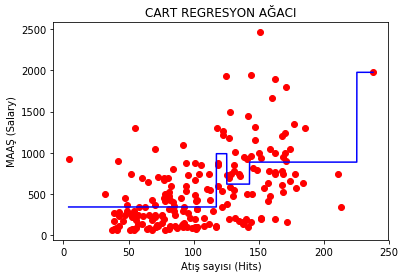

In [43]:
X_grid=np.arange(min(np.array(X_train)), max(np.array(X_train)),0.01)
X_grid=X_grid.reshape(len(X_grid),1)

plt.scatter(X_train,y_train,color="red")

plt.plot(X_grid, cart_model.predict(X_grid), color="blue")

plt.title("CART REGRESYON AĞACI")
plt.xlabel("Atış sayısı (Hits)")
plt.ylabel("MAAŞ (Salary)")

In [44]:
# mean_leaf_nodes=5 kullanarak yapılan değişken tahmini
cart_model.predict(X_test)[:3]

array([621.96792308, 888.13704444, 621.96792308])

In [45]:
y_pred=cart_model.predict(X_test)

In [46]:
np.sqrt(mean_squared_error(y_test,y_pred))

479.5201716052201

In [ ]:
#tüm değişkenler kullanılarak yapılan değişken tahmini

In [34]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division", "NewLeague",]]) #kategorik değişkenleri dummies değişkenlere çevirmeliyiz
y=df["Salary"]  # bağımlı değişkeni y değişkenine kaydediyoruz
X_=df.drop(["Salary", "League", "Division","NewLeague"], axis=1).astype("float64") #ilk hallerini dışarıda bırakıyoruz
X=pd.concat([X_,dms[["League_N", "Division_W","NewLeague_N"]]], axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)


In [35]:
cart_model=DecisionTreeRegressor().fit(X_train,y_train)

In [38]:
y_pred=cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

517.6663966653035

# Model tuning

In [47]:
cart_model=DecisionTreeRegressor().fit(X_train, y_train)

In [48]:
cart_model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [51]:
y_pred=cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

468.49579052913884

In [57]:
cart_params={"max_depth": [1,2,4,9,12],
             "min_samples_split" : [45,52,78,30,40]}

In [58]:
grid=GridSearchCV(cart_model, cart_params,cv=10).fit(X_train,y_train)

C:\Users\mroguzdogu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [60]:
y_pred=grid.predict(X_test)

In [73]:
np.sqrt(mean_squared_error(y_test,y_pred))

423.406689243066

In [64]:
grid.best_params_

{'max_depth': 9, 'min_samples_split': 78}

In [69]:
#final mode

final_tuning=DecisionTreeRegressor(max_depth=9, min_samples_split=78).fit(X_train, y_train)

In [70]:
y_pred=final_tuning.predict(X_test)

In [72]:
np.sqrt(mean_squared_error(y_test,y_pred))

423.406689243066

# Random forests

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors

In [3]:
df=pd.read_csv("Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division", "NewLeague",]]) #kategorik değişkenleri dummies değişkenlere çevirmeliyiz
y=df["Salary"]  # bağımlı değişkeni y değişkenine kaydediyoruz
X_=df.drop(["Salary", "League", "Division","NewLeague"], axis=1).astype("float64") #ilk hallerini dışarıda bırakıyoruz
X=pd.concat([X_,dms[["League_N", "Division_W","NewLeague_N"]]], axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)


FileNotFoundError: [Errno 2] File Hitters.csv does not exist: 'Hitters.csv'

# Model & tahmin

In [ ]:
rf_model=RandomForestRegressor().fit(X_train, y_train) # modeli kurma ve fit etme işlemi

In [5]:
rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [6]:
y_pred=rf_model.predict(X_test)

In [7]:
np.sqrt(mean_squared_error(y_test,y_pred))

351.76043169617026

In [8]:
rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [13]:
rf_params={"max_depth": [10,20,30],
           "max_leaf_nodes": [2,5,7]}


In [14]:
cv_model=GridSearchCV(rf_model,rf_params,cv=10).fit(X_train,y_train)

C:\Users\mroguzdogu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [15]:
cv_model.best_params_

{'max_depth': 10, 'max_leaf_nodes': 7}

In [17]:
ef_model=RandomForestRegressor(max_depth=10, max_leaf_nodes=7).fit(X_train,y_train)

C:\Users\mroguzdogu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [21]:
# final tuned
y_pred=ef_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

364.447279322759